In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import pandas as pd

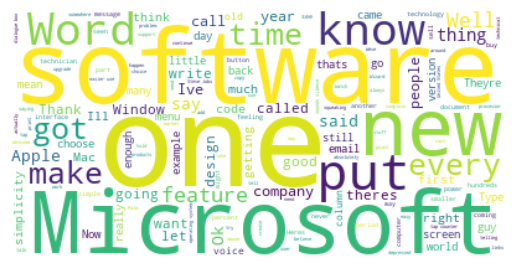

<PIL.Image.Image image mode=RGB size=400x200 at 0x1FC06386630>


In [242]:
csv_file = "ted_talks_en.csv"
fullDataSet = pd.read_csv(csv_file)

stop_words = set(stopwords.words('english'))

def cleanText(text):
    cleaned_text = re.sub(r'\([^)]*\)', '', text)
    words = cleaned_text.split()
    cleaned_text = [word for word in words if word.lower() not in stop_words]
    cleaned_text = ' '.join(cleaned_text)
    cleaned_text = cleaned_text.replace('[', '').replace(']', '').replace("'", "").replace(",", "").replace("Im", "")
    return cleaned_text

def wordCloudPlt(text):
    wordcloud = WordCloud(background_color='white', collocations=True).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def wordCloudImage(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color='white', collocations=True).generate(text)
    # Display the generated image:
    wordcloud_image = wordcloud.to_image()
    return wordcloud_image

fullDataSet = fullDataSet.transcript[2]
fullDataSet = cleanText(fullDataSet)
wordCloudPlt(fullDataSet)

 like new said word got company software microsoft ive ok features know make people theres good going want called makes smaller apples thing buy column way percent version power code use mac thank years ill windows think things simplicity getting


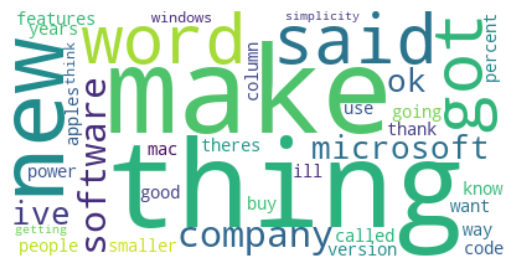

In [243]:
def topics(data, numberOfWords):
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    X = vectorizer.fit_transform(pd.Series(data.split()))
    num_topics = 1
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(X)
    feature_names = vectorizer.get_feature_names_out()
    text = ""
    for topic_idx, topic in enumerate(nmf_model.components_):
        for i in topic.argsort()[:-numberOfWords - 1:-1]:
            text = text + " " + feature_names[i] 
    return text

def trainNmf(nmf_model):
    

data = pd.read_csv(csv_file)
data = data.transcript[2]
data = cleanText(data)
data = topics(data, 40)
print(data)

wordCloudPlt(data)